# **Importing Libraries**

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings  
warnings.filterwarnings('ignore')

# **Importing Dataset**

In [37]:
titanic = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
ans = pd.read_csv('gender_submission.csv')

In [38]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [40]:
titanic.shape

(891, 12)

In [41]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# **Features**

**pclass**: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

<Figure size 720x1224 with 0 Axes>

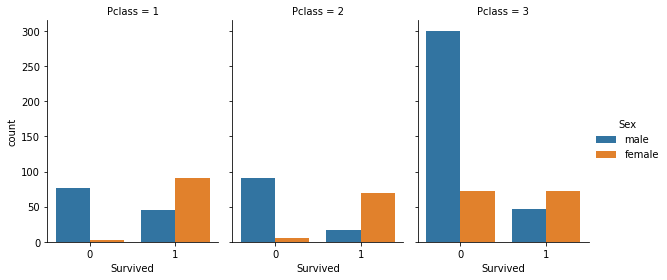

In [42]:
plt.figure(figsize=(10,17))
g = sns.catplot(x="Survived", hue="Sex", col="Pclass", data=titanic, kind="count", height=4, aspect=.7);

 **Chances of MALE PASSENGER'S Survival are very low. And it tremendously decreases if the passenger is from Lower Class.**

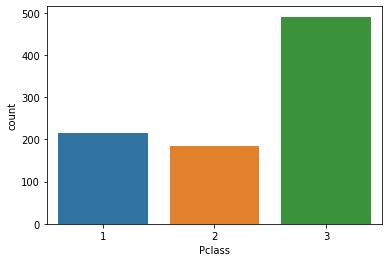

In [43]:
sns.countplot(x="Pclass",data=titanic)

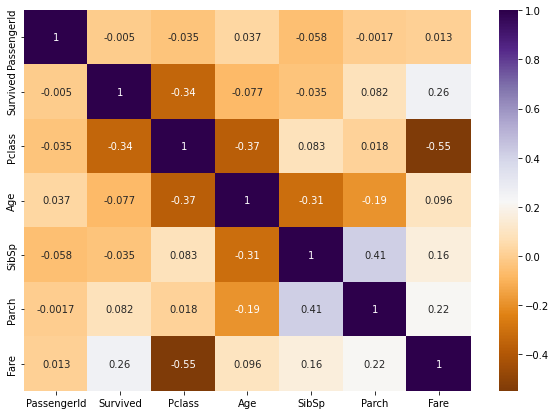

In [44]:
# Checking correlation among variables
plt.figure(figsize=(10,7))
sns.heatmap(titanic.corr(),annot=True,cmap="PuOr")

**Clearly visible that pClass and Fare are negatively related**


 pClass = 1 (UpperClass)

 pClass = 2 (MiddleClass)

 pClass = 3 (LowerClass)

 So lower the Class value higher the fare charges are.

**PassengerID , Name and Cabin are not correlated with any feature. So, they can be considered as Redundant-Feature.**

In [45]:
#One-hot Encoding
titanic1 = pd.get_dummies(titanic, columns = ['Sex','Embarked'])
test1 = pd.get_dummies(test, columns = ['Sex','Embarked'])

In [46]:
titanic2 = titanic1.drop(['PassengerId','Cabin','Name','Ticket'],axis='columns')
test2 = test1.drop(['PassengerId','Cabin','Name','Ticket'],axis='columns')

In [47]:
titanic2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


# **Outliers Detection**

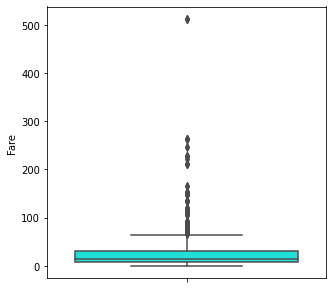

In [48]:
plt.figure(figsize=(5,5))
sns.boxplot(y=titanic['Fare'],orient="h", palette="hsv")

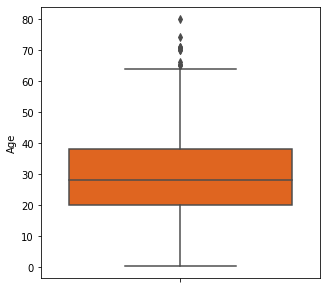

In [49]:
plt.figure(figsize=(5,5))
sns.boxplot(y=titanic['Age'],orient="h", palette="hot")

In [50]:
titanic3 = titanic2[titanic2['Age']<= 60]
titanic3 = titanic2[titanic2['Fare']<= 80]

In [51]:
titanic3.shape

(817, 11)

In [52]:
titanic3.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [53]:
titanic3.isna().sum()

Survived        0
Pclass          0
Age           170
SibSp           0
Parch           0
Fare            0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [54]:
test2.isna().sum()

Pclass         0
Age           86
SibSp          0
Parch          0
Fare           1
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [55]:
titanic3['Age'] = titanic3['Age'].replace(np.NaN,titanic3['Age'].mean())
test2['Age'] = test2['Age'].replace(np.NaN,test2['Age'].mean())
test2['Fare'] = test2['Fare'].replace(np.NaN,test2['Fare'].mean())

In [56]:
cols_to_norm = ['Age','Fare']
titanic3[cols_to_norm] = titanic3[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
test2[cols_to_norm] = test2[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [57]:
titanic3.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0.271174,1,0,0.090625,0,1,0,0,1
1,1,1,0.472229,1,0,0.891041,1,0,1,0,0
2,1,3,0.321438,0,0,0.099062,1,0,0,0,1
3,1,1,0.434531,1,0,0.663750,1,0,0,0,1
4,0,3,0.434531,0,0,0.100625,0,1,0,0,1


In [58]:
test2.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,0.452723,0,0,0.015282,0,1,0,1,0
1,3,0.617566,1,0,0.013663,1,0,0,0,1
2,2,0.815377,0,0,0.018909,0,1,0,1,0
3,3,0.353818,0,0,0.016908,0,1,0,0,1
4,3,0.287881,1,1,0.023984,1,0,0,0,1


# **X-Y Split**

In [59]:
x_train = titanic3.iloc[:,1:11]
y_train = titanic3.iloc[:,0]
x_train.shape,y_train.shape

((817, 10), (817,))

In [60]:
x_test = test2.iloc[:,:]

In [61]:
y_test = ans.iloc[:,1]

In [62]:
x_test,y_test

(     Pclass       Age  SibSp  ...  Embarked_C  Embarked_Q  Embarked_S
 0         3  0.452723      0  ...           0           1           0
 1         3  0.617566      1  ...           0           0           1
 2         2  0.815377      0  ...           0           1           0
 3         3  0.353818      0  ...           0           0           1
 4         3  0.287881      1  ...           0           0           1
 ..      ...       ...    ...  ...         ...         ...         ...
 413       3  0.396975      0  ...           0           0           1
 414       1  0.512066      0  ...           1           0           0
 415       3  0.505473      0  ...           0           0           1
 416       3  0.396975      0  ...           0           0           1
 417       3  0.396975      1  ...           1           0           0
 
 [418 rows x 10 columns], 0      0
 1      1
 2      0
 3      0
 4      1
       ..
 413    0
 414    1
 415    0
 416    0
 417    0
 Name: Surv

In [63]:
np.any(np.isnan(x_test))
np.all(np.isfinite(x_test))

True

In [64]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Age         418 non-null    float64
 2   SibSp       418 non-null    int64  
 3   Parch       418 non-null    int64  
 4   Fare        418 non-null    float64
 5   Sex_female  418 non-null    uint8  
 6   Sex_male    418 non-null    uint8  
 7   Embarked_C  418 non-null    uint8  
 8   Embarked_Q  418 non-null    uint8  
 9   Embarked_S  418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 18.5 KB


In [65]:
x_train.columns,x_test.columns

(Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
        'Embarked_C', 'Embarked_Q', 'Embarked_S'],
       dtype='object'),
 Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
        'Embarked_C', 'Embarked_Q', 'Embarked_S'],
       dtype='object'))

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

log_clf = LogisticRegression(max_iter=1000,solver='lbfgs')
rnd_clf = RandomForestClassifier(n_estimators = 1,criterion = 'entropy',random_state =7)
det_clf = DecisionTreeClassifier(max_depth=2)
knn_clf = KNeighborsClassifier(n_neighbors=2)
nbg_clf = GaussianNB()

for clf in (log_clf, rnd_clf, det_clf, knn_clf, nbg_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__,"\nAccuracy_score: ",100*accuracy_score(y_test, y_pred))
    print("**********************************************************")

LogisticRegression 
Accuracy_score:  94.97607655502392
**********************************************************
RandomForestClassifier 
Accuracy_score:  53.110047846889955
**********************************************************
DecisionTreeClassifier 
Accuracy_score:  81.81818181818183
**********************************************************
KNeighborsClassifier 
Accuracy_score:  79.18660287081339
**********************************************************
GaussianNB 
Accuracy_score:  92.34449760765551
**********************************************************
